In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
def percent_scaling(series):
    return (series / 100)

def cpu_scaling(series):
    return (series * 4 / 100)

def single_cpu_scaling(series):
    return (((series - 100) * (-1)) / 100)

def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

In [3]:
fftw_df = pd.read_csv('../results/fftw_perf.csv')

fftw_df['current_norm'] = min_max_scaling(fftw_df['current'])
fftw_df['cycles_sum'] = fftw_df[['cycles_0','cycles_1','cycles_2','cycles_3']].sum(axis=1)
fftw_df['insns_sum'] = fftw_df[['insns_0','insns_1','insns_2','insns_3']].sum(axis=1)

fftw_df

,time,current,cycles_0,insns_0,cycles_1,insns_1,cycles_2,insns_2,cycles_3,insns_3,current_norm,cycles_sum,insns_sum
0,2494,1.696,239403,131122,6459,1519,6524,1569,6482,1593,0.064550,258868,135803
1,3964,1.696,222265,121682,5571,1485,5817,1518,6823,1670,0.064550,240476,126355
2,5443,1.696,224032,122540,5579,1474,5572,1505,6552,1668,0.064550,241735,127187
3,6909,1.696,221833,121960,5628,1485,5571,1501,5558,1481,0.064550,238590,126427
4,8374,1.564,212972,118493,5567,1468,5630,1476,5647,1501,0.029630,229816,122938
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23464,30486718,1.664,15744,6481,6071,1764,6153,1780,189841,102422,0.056085,217809,112447
23465,30487930,1.664,15512,6463,6042,1770,6105,1762,187965,100843,0.056085,215624,110838
23466,30489148,1.732,15644,6497,6034,1777,6169,1782,183658,99663,0.074074,211505,109719
23467,30490362,1.732,15529,6465,6057,1765,6062,1756,185651,100640,0.074074,213299,110626


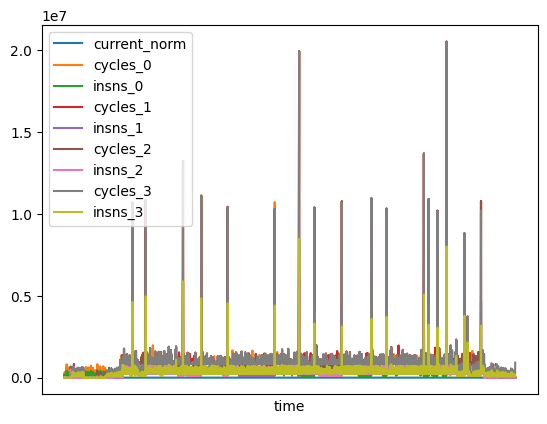

In [5]:
fftw_df.plot(x='time', y=['current_norm','cycles_0','insns_0','cycles_1','insns_1','cycles_2','insns_2','cycles_3','insns_3'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

In [7]:
fftw_df.drop('time', axis=1).corr()['current']

current         1.000000
cycles_0        0.628421
insns_0         0.581096
cycles_1        0.680650
insns_1         0.681360
cycles_2        0.665241
insns_2         0.652833
cycles_3        0.619720
insns_3         0.562029
current_norm    1.000000
cycles_sum      0.687785
insns_sum       0.681979
Name: current, dtype: float64

In [8]:
cpu_df = pd.read_csv('../results/cpu_perf.csv')

cpu_df['current_norm'] = min_max_scaling(cpu_df['current'])
cpu_df['cycles_sum'] = cpu_df[['cycles_0','cycles_1','cycles_2','cycles_3']].sum(axis=1)
cpu_df['insns_sum'] = cpu_df[['insns_0','insns_1','insns_2','insns_3']].sum(axis=1)

cpu_df

,time,current,cycles_0,insns_0,cycles_1,insns_1,cycles_2,insns_2,cycles_3,insns_3,current_norm,cycles_sum,insns_sum
0,102536,1.208,863098,379859,551886,252279,267409,123652,311757,146735,0.007407,1994150,902525
1,204116,1.204,68587,34718,373758,199951,80896,37612,42817,21066,0.006349,566058,293347
2,305667,1.192,18050,6688,412419,219224,63626,29436,7130,1800,0.003175,501225,257148
3,407227,1.196,206004,61514,328918,179606,135426,56189,7021,1791,0.004233,677369,299100
4,508788,1.196,40614,16829,375176,201980,82591,37792,6839,1767,0.004233,505220,258368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,16339841,1.200,316947,175409,42845,18567,75076,33959,57607,26495,0.005291,492475,254430
161,16441381,1.188,332541,183746,6920,1794,7239,1851,60787,28553,0.002116,407487,215944
162,16542923,1.196,358547,194077,64421,29246,53871,23926,58453,26558,0.004233,535292,273807
163,16644531,1.196,532962,258681,2056796,1498955,7536,1804,58206,26628,0.004233,2655500,1786068


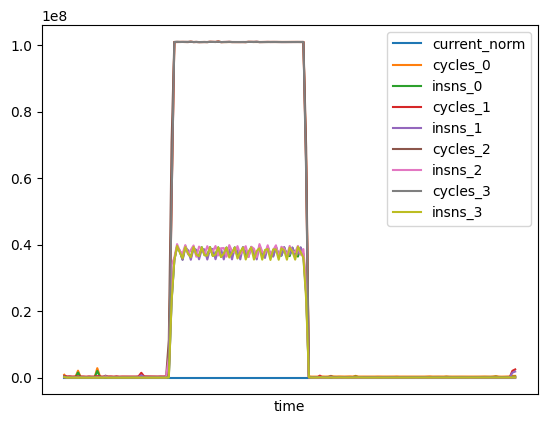

In [9]:
cpu_df.plot(x='time', y=['current_norm','cycles_0','insns_0','cycles_1','insns_1','cycles_2','insns_2','cycles_3','insns_3'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

In [12]:
cpu_df.drop('time', axis=1).corr()['current']

current         1.000000
cycles_0        0.993733
insns_0         0.993126
cycles_1        0.993857
insns_1         0.992709
cycles_2        0.993279
insns_2         0.992044
cycles_3        0.994224
insns_3         0.994224
current_norm    1.000000
cycles_sum      0.993900
insns_sum       0.993697
Name: current, dtype: float64